# Классификация

На первом нашем занятии мы разбирали и решали задачу регрессии - то есть задачу восстановления зависимости. Однако, на практике далеко не всегда требуется восстановить полную зависимость. Иногда достаточно определить то, к какому "типу" или "классу" относится объект. Задачи такого рода называются задачами классификации.

Классификация — это задача машинного обучения с учителем, цель которой заключается в разделении объектов на заранее заданные классы.

**Математическая постановка задачи:**

Пусть дан набор данных $\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$, где:
- $x_i \in R^d$ вектор признаков $i$-го объекта;
- $y_i \in {1,2,...,K}$ метка класса, соответствующая $i$-ому объекту;
- $d$ количество признаков;
- $n$ - количество объектов в обучающем наборе;
- $K$ - количество классов.

Цель классификации: Построить функцию $f(x)$, которая сопоставляет каждому объекту с признаками $x_i$ его класс $y_i$. Функция $f(x)$ называется моделью классификации.

**Типы классификации:**
1. Бинарная классификация

Задача состоит в разделении объектов на два класса:
- $y \in \{0,1\}$ или $y \in \{-1,1\}$.
- Примеры: фильтрация спама (спам/не спам), обнаружение мошенничества (мошенничество/не мошенничество), определение пола человека (мужчина/женщина).

2. Многоклассовая классификация

Объекты разделяются на более чем два класса:
- $y \in \{1,2,...,K\}$, где $K > 2$ - количество классов.
- Примеры: классификация изображений по категориям (животные, транспорт, здания), определение языков текста.


Простейшим случаем классификации является **бинарная классификация**, то есть случай, когда у нас имеется два класса. Ключевое отличие от линейной регрессии состоит в том, что пространство ответов состоит из двух элементов, например, возьмём , где  и  означают принадлежность к первому или второму классу, соответственно.

**Обычно, в классификации один класс называют положительным (1) и отрицательным (0 или -1).**

Например, для задачи распознавания спам-писем эти значения могли бы занчить: -1 означало, что письмо не является спамом, а 1 - что является.

## Логистическая регрессия

**Логистическая регрессия - простейщий вид бинарной классификации, это линейная модель.**

Регрессией она называется потому что выводится из линейной регресии (не путайте эти два алгоритма для разных типов задач! но основаны на одном и том же линейном уравнении!).

Т.е. в данном случае сама модель будет представлена в виде все той же функции, которую мы немного преобразуем:

$$
f(x) = y = w_1*x_1 + w_2*x_2 + ... + w_n*x_n + w_0 = \sum^{d}_{i=0} w_i*x_i
$$

Или в векторном виде:

$$
f(x) = \left ( \left \langle w,x \right \rangle \right )
$$

Только в случаи классификации нам нужно не само значение этого уравнения, а его знак:

$$ f(x) = \text{sign} \left ( \sum^{d}_{i=0}w_{i}x^{i} \right ) = \text{sign} \left ( \left \langle w,x \right \rangle \right ).$$

Множество точек  образует гиперплоскость в пространстве признаков и делит его на две части. Объекты, расположенные по разные стороны от нее, относятся к разным классам. Гиперплоскость - это обобщённое название плоскости для многомерного пространство (в случае двумерного пространство плоскость - это прямая, в трёхмерном - плоскость).

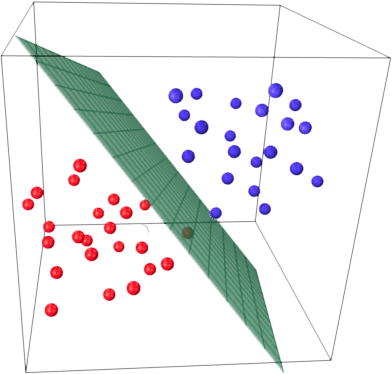

Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу «+1» $P(y=1|x)$. Она будет принимать значения от 0 до 1 - наша задача её предсказывать. Решение этой задачи регрессионным методом выглядит так: $$f(x)=\left \langle w,x_{i} \right \rangle$$

Но у этого решения есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Оно вообще говоря возвращает значения на всем возможном отрезке, от минус бесконечности до плюс бесконечности.

Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая станет переводить полученное в скалярном произведении значение в вероятность, а пределы такой вероятности будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берётся сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-f(x))} = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle))}$$

Где $exp$ - это экспонента.

Сигмоидная функция гладкая и дифференцируемая, поэтому можно использовать градиентный спуск для оптимизации параметров $w$ на основе логарифмической функции потерь (логистической). К тому же она возвращает вероятность принаждлежности к классу, что позволяет судить о степени уверенности классификатора.

## Теперь давайте рассмотрим построение модели Логистической регрессии с помощью готовых методов модуля scikit-learn.

In [2]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [3]:
!pip install opendatasets --quiet

Рассмотрим датасет из предыдущего урока для примера с платформы Kaggle и предположим, что нам необходимо определить пол студента, то есть реализовать алгоритм бинарной классификации (female и male):

In [4]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/allexanderspb/studentsperformance'
od.download(dataset_url)

# {"username":"adele1997","key":"178dfad8b656a812e88356260d0188b4"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/allexanderspb/studentsperformance


100%|██████████| 8.70k/8.70k [00:00<00:00, 12.1MB/s]

In [5]:
import pandas as pd

df = pd.read_csv('/content/studentsperformance/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [17]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


Когда вы готовите данные для обучения модели, важно следовать правильному порядку операций, чтобы обеспечить корректность и качество модели. Поэтому мы сначала разделим наш исходный набор данных на тренировочную и тестовую подвыборки, а далее будет делать все преобразования и обучать алгоритм логистической регрессии:

In [6]:
from sklearn.model_selection import train_test_split

# выделяем вектор признаков
X = df.drop(columns='gender')
# выделяем вектор целевой переменной
y = df['gender']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Так как большая часть переменных у нас представлена в виде категорий типа «строка», то сначала закодируем их:

from sklearn.preprocessing import OrdinalEncoder

categorical_features = ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for column in categorical_features:
    label_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    # Обучаем на тренировочной подвыборке и сразу преобразовываем ее
    X_train[column] = label_encoder.fit_transform(X_train[column].values.reshape(-1, 1))

    # Преобразуем тестовую подвыборку с использованием того же обученного кодировщика
    X_test[column] = label_encoder.transform(X_test[column].values.reshape(-1, 1))

X_train

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
29,3.0,3.0,1.0,1.0,62,70,75
535,2.0,1.0,0.0,0.0,66,83,83
695,3.0,4.0,0.0,1.0,79,89,86
557,2.0,3.0,0.0,1.0,61,67,66
836,4.0,2.0,1.0,1.0,73,64,57
...,...,...,...,...,...,...,...
106,3.0,3.0,1.0,1.0,87,100,100
270,2.0,1.0,1.0,1.0,69,63,61
860,2.0,0.0,1.0,1.0,53,62,53
435,2.0,4.0,0.0,0.0,50,48,53


Важно осознанно подходить к выбору метода кодирования переменных. В данном случае для быстроты и удобства мы используем `OrdinalEncoder()`. Он работает аналогично `LabelEncoder()`, но обычно применяется для кодирования признаков, а `LabelEncoder()` для кодирования целевой переменной, а также заменяет неизвестные категории на `-1`.

In [9]:
# Теперь закодируем целевую переменную

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [10]:
# Теперь создадим модель логистической регрессии и обучим ее на тренировочной подвыборке:
model = LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
# Подскажем ответы для тестовой подвыборки:

y_pred = model.predict(X_test)

In [12]:
# Так как логистическая регрессия — это линейная модель, которая строит гиперплоскость,
# разделяющую наши объекты на классы, мы можем восстановить уравнение разделяющей плоскости:

w0 = model.intercept_
w = model.coef_

In [13]:
# Получаем коэффициенты (для n признаков) и смещение
coefficients = model.coef_[0]  # Коэффициенты для признаков
intercept = model.intercept_[0]  # Смещение

# Записываем уравнение разделяющей гиперплоскости
equation = " + ".join([f"{round(coefficients[i], 4)}*x{i+1}" for i in range(len(coefficients))])
equation = f"({round(intercept, 4)}) + " + equation

print(f"Уравнение разделяющей гиперплоскости: {equation}")

Уравнение разделяющей гиперплоскости: (5.3815) + -0.2276*x1 + -0.0302*x2 + -0.7742*x3 + -1.922*x4 + 0.4108*x5 + -0.0278*x6 + -0.4176*x7


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.915
Precision: 0.9215686274509803
Recall: 0.912621359223301
F1-score: 0.9170731707317074


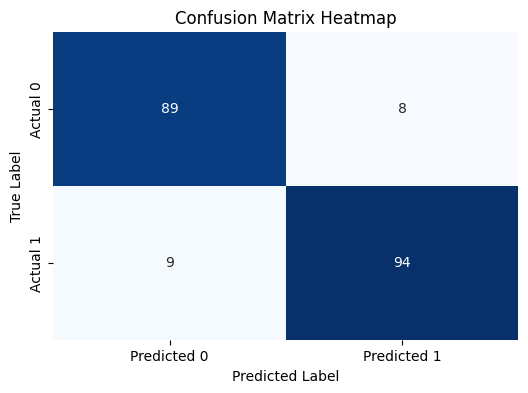

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация с помощью heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()